In [1]:
import pandas as pd

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [2]:
train.shape, test.shape

((2000, 65), (500, 56))

In [3]:
train.columns

Index(['Component1_fraction', 'Component2_fraction', 'Component3_fraction',
       'Component4_fraction', 'Component5_fraction', 'Component1_Property1',
       'Component2_Property1', 'Component3_Property1', 'Component4_Property1',
       'Component5_Property1', 'Component1_Property2', 'Component2_Property2',
       'Component3_Property2', 'Component4_Property2', 'Component5_Property2',
       'Component1_Property3', 'Component2_Property3', 'Component3_Property3',
       'Component4_Property3', 'Component5_Property3', 'Component1_Property4',
       'Component2_Property4', 'Component3_Property4', 'Component4_Property4',
       'Component5_Property4', 'Component1_Property5', 'Component2_Property5',
       'Component3_Property5', 'Component4_Property5', 'Component5_Property5',
       'Component1_Property6', 'Component2_Property6', 'Component3_Property6',
       'Component4_Property6', 'Component5_Property6', 'Component1_Property7',
       'Component2_Property7', 'Component3_Property7', 'C

In [4]:
train.isnull().sum().sum()

np.int64(0)

In [5]:
# get last 10 columns as target columns

target_columns= train.columns[-10:].tolist()
target_columns

['BlendProperty1',
 'BlendProperty2',
 'BlendProperty3',
 'BlendProperty4',
 'BlendProperty5',
 'BlendProperty6',
 'BlendProperty7',
 'BlendProperty8',
 'BlendProperty9',
 'BlendProperty10']

In [6]:
input_features = train.drop(columns=target_columns)
target_features = train[target_columns]

In [7]:
input_features.shape, target_features.shape

((2000, 55), (2000, 10))

### Dataset Overview

The dataset consists of fuel blend data used to predict 10 target fuel properties.  
The training file (`train.csv`) contains 2000 samples with 55 input features and 10 output targets.  
Each sample represents a blend of 5 components with their physical and chemical properties.

The test file (`test.csv`) contains 500 samples with the same 55 input features but without target columns.  
These test samples are used for model evaluation on the leaderboard.

No missing values were found in the training data.  
All features are numeric, making the dataset ready for model development

In [8]:
# get first 55 columns as input features
feature_list= train.columns[:-10].tolist()
feature_list

['Component1_fraction',
 'Component2_fraction',
 'Component3_fraction',
 'Component4_fraction',
 'Component5_fraction',
 'Component1_Property1',
 'Component2_Property1',
 'Component3_Property1',
 'Component4_Property1',
 'Component5_Property1',
 'Component1_Property2',
 'Component2_Property2',
 'Component3_Property2',
 'Component4_Property2',
 'Component5_Property2',
 'Component1_Property3',
 'Component2_Property3',
 'Component3_Property3',
 'Component4_Property3',
 'Component5_Property3',
 'Component1_Property4',
 'Component2_Property4',
 'Component3_Property4',
 'Component4_Property4',
 'Component5_Property4',
 'Component1_Property5',
 'Component2_Property5',
 'Component3_Property5',
 'Component4_Property5',
 'Component5_Property5',
 'Component1_Property6',
 'Component2_Property6',
 'Component3_Property6',
 'Component4_Property6',
 'Component5_Property6',
 'Component1_Property7',
 'Component2_Property7',
 'Component3_Property7',
 'Component4_Property7',
 'Component5_Property7',
 'Com

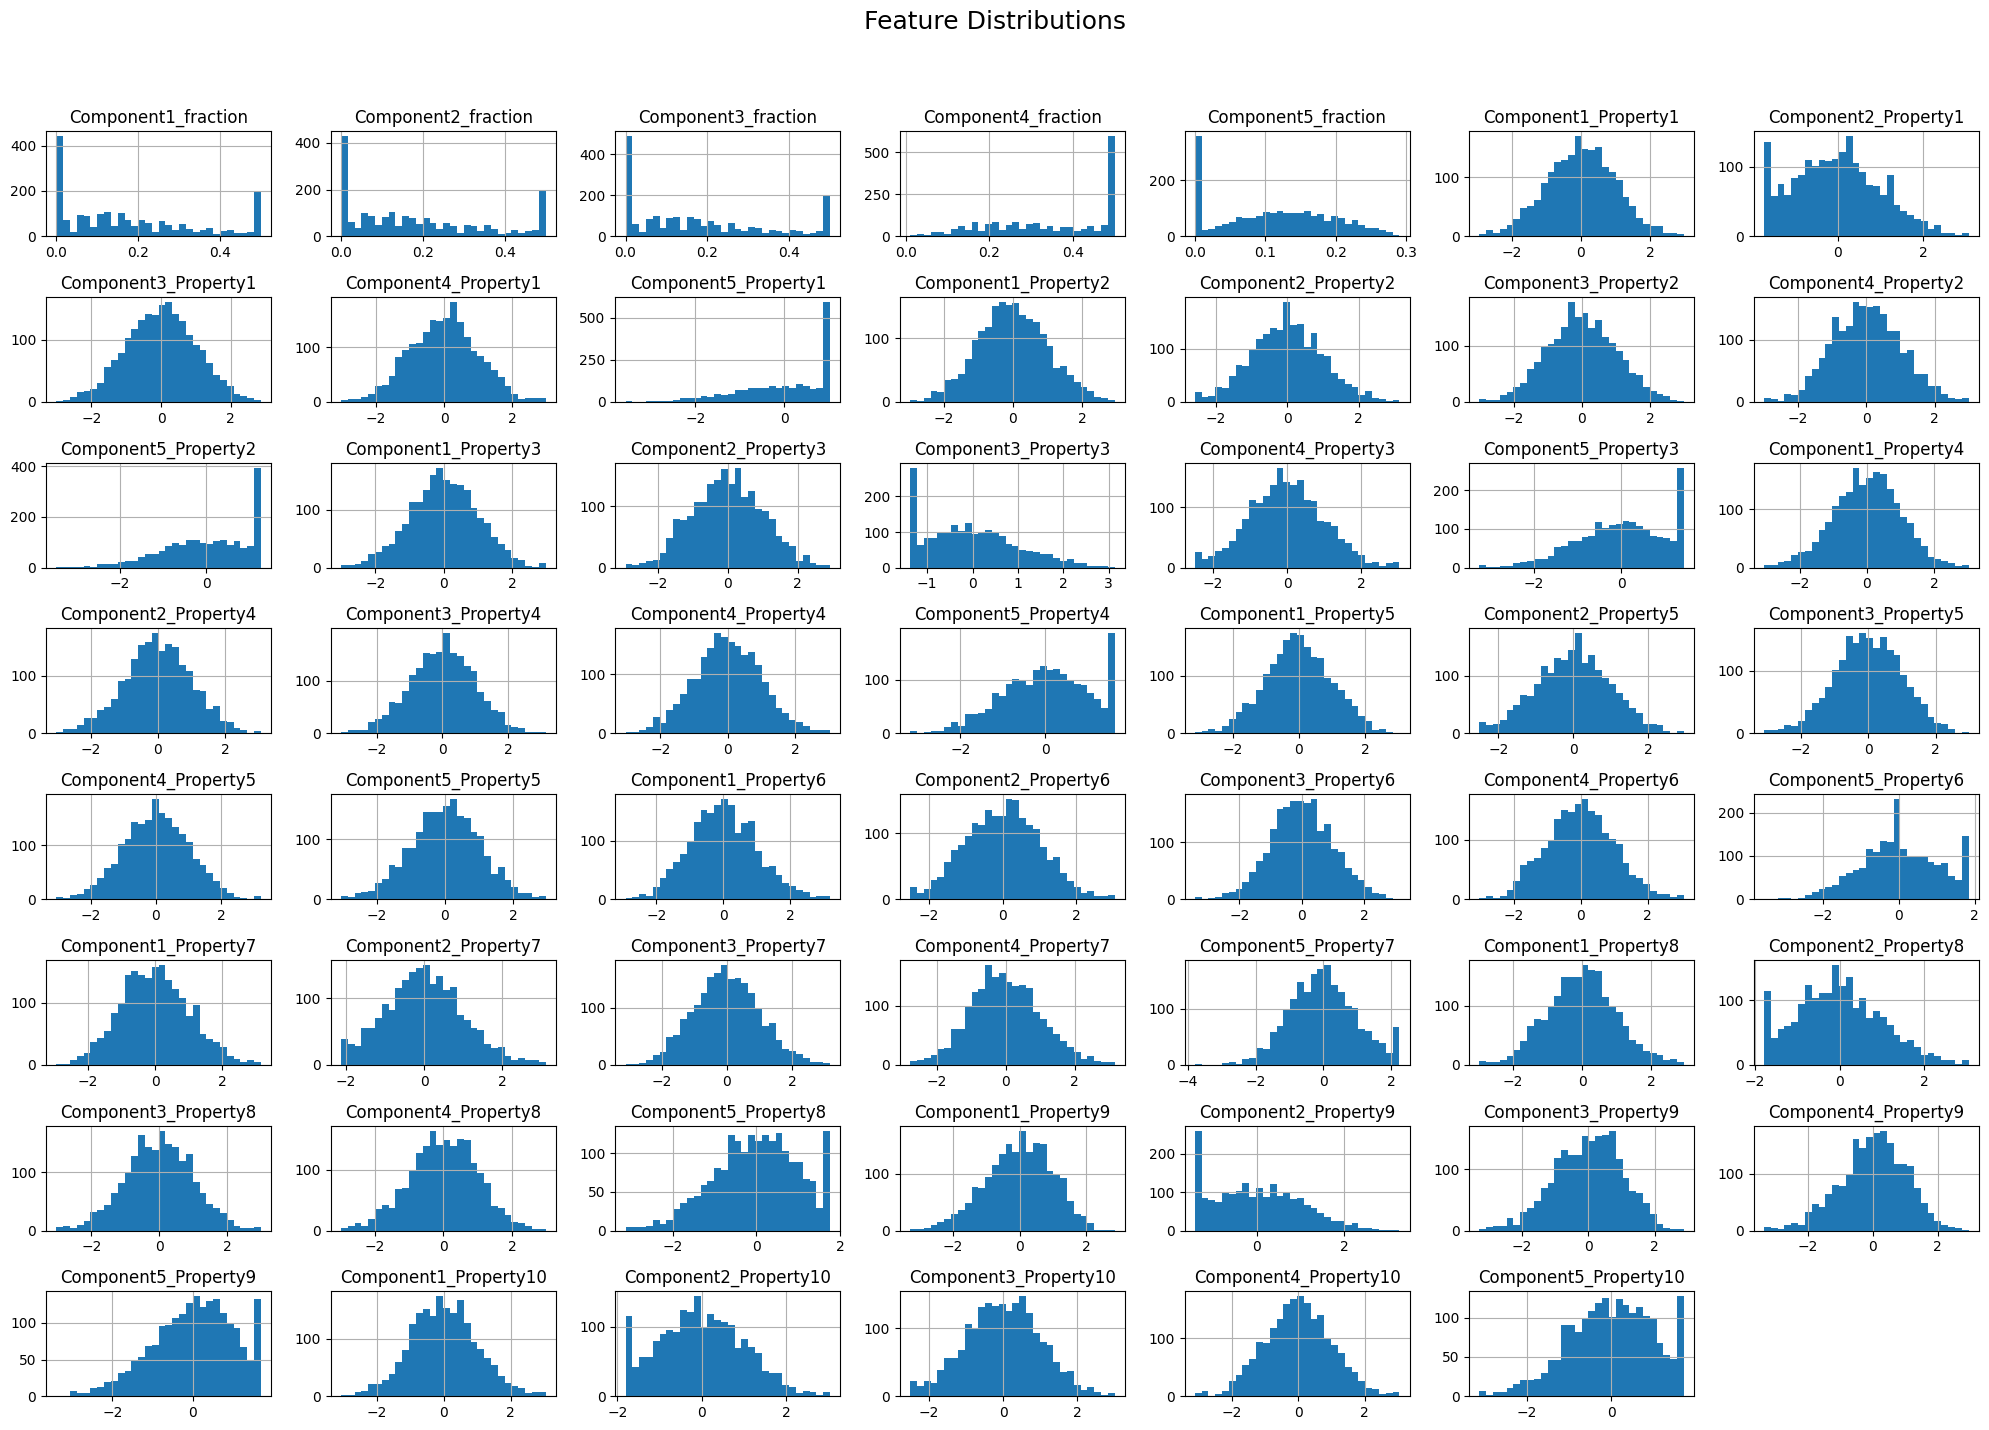

In [9]:
# Spread and Shape of Data

import matplotlib.pyplot as plt
import seaborn as sns

train[feature_list].hist(figsize=(20,15), bins=30)
plt.suptitle("Feature Distributions", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Summary: Feature Distributions

Component_fraction features (1-5): These are mostly right-skewed, meaning their data peaks on the left with a long tail extending to the right. Component3 and Component4 are the best examples.

Component_Property features (1-10): These mostly follow a normal distribution (bell curve) and appear to be pre-standardized. A few show slight skewness (e.g., Component1_Property1 is slightly right-skewed).

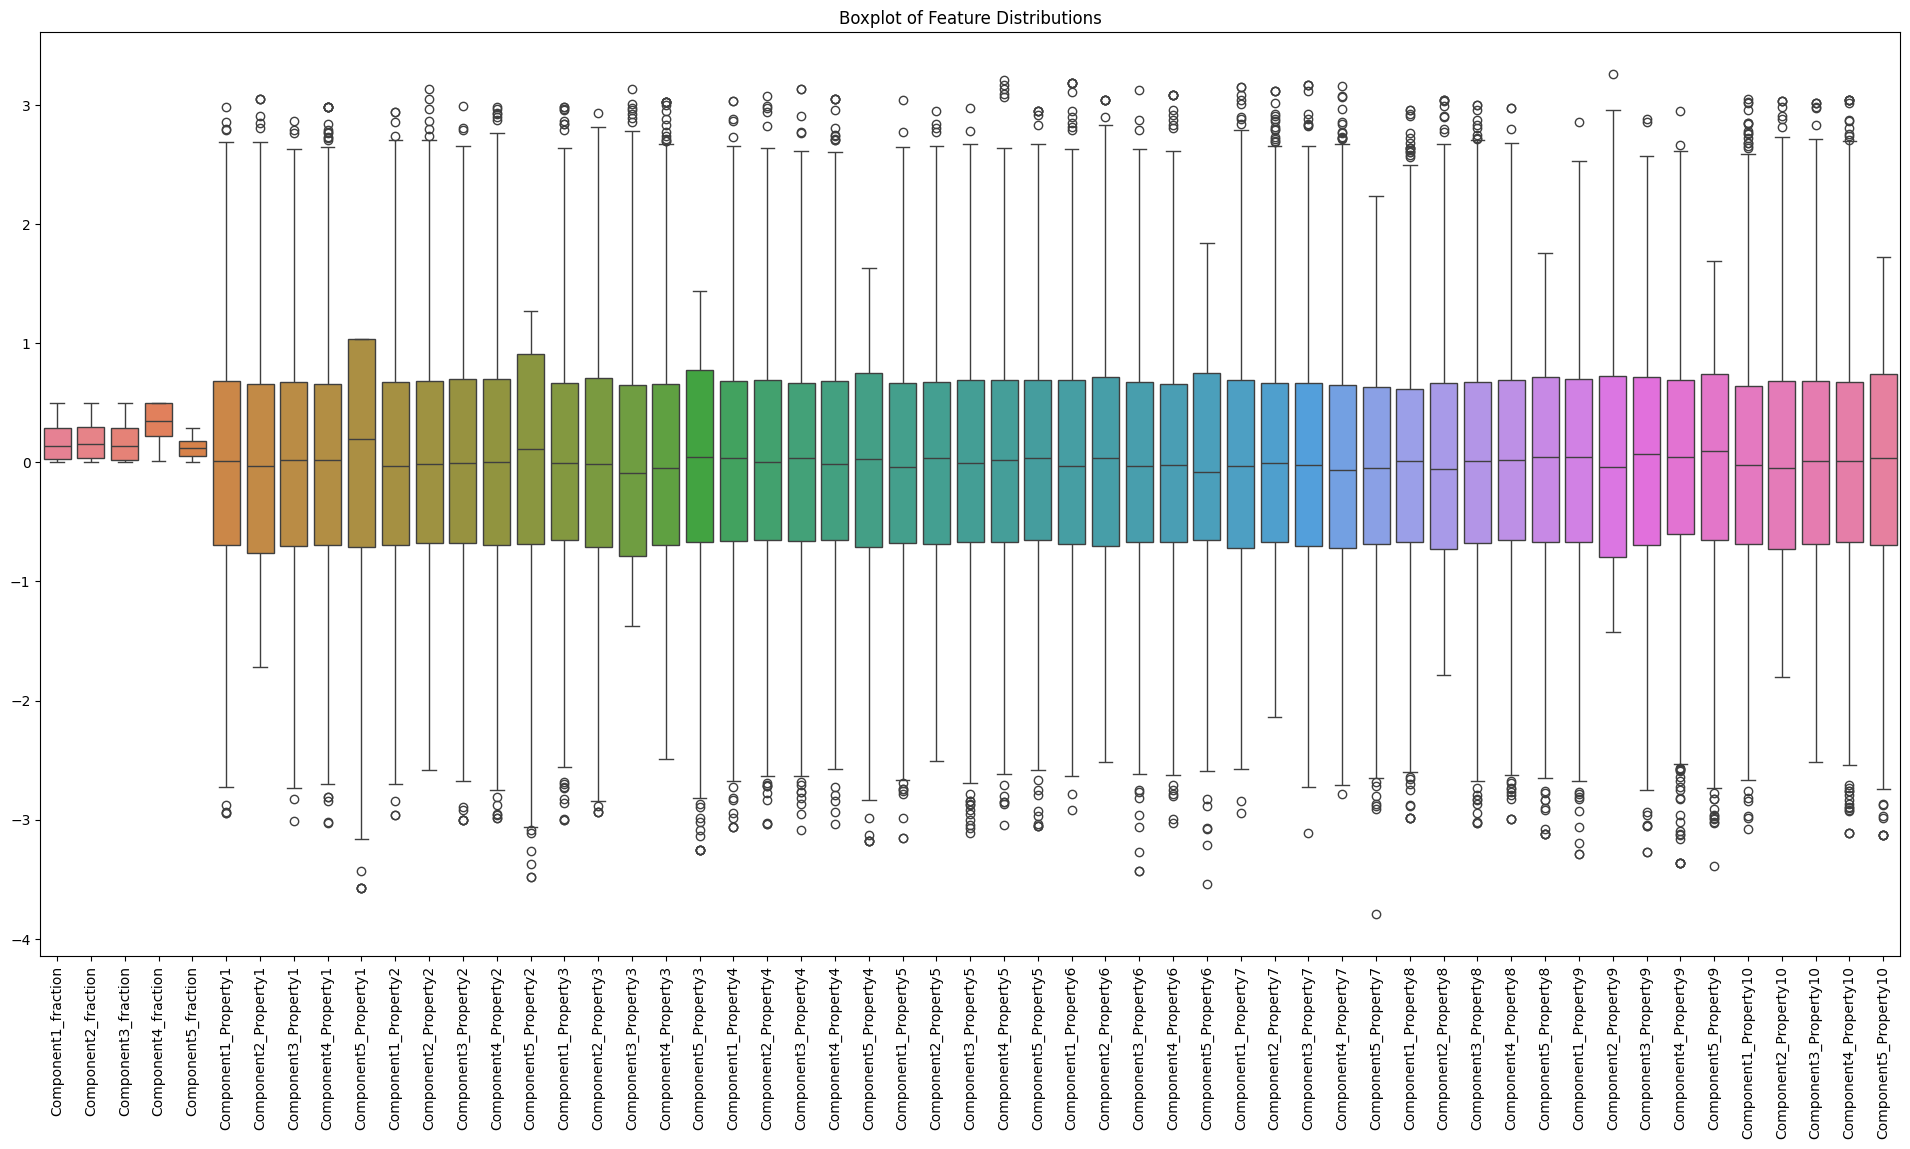

In [10]:
# Understand Range and Outliers

plt.figure(figsize=(24,12))
sns.boxplot(data=train[feature_list])
plt.title("Boxplot of Feature Distributions")
plt.xticks(rotation=90)
plt.show()

#### Summary: Boxplot of Feature Distributions

Component_fraction Features: These have a very small spread (IQR), meaning the data shows little variation. Their median is slightly above zero.

Component_Property Features: These appear to be well-standardized, with medians near zero and a uniform spread across features.

Key Finding: Outliers: The most important insight is the presence of significant outliers on both the positive and negative sides for all features. These must be investigated and handled before model training.

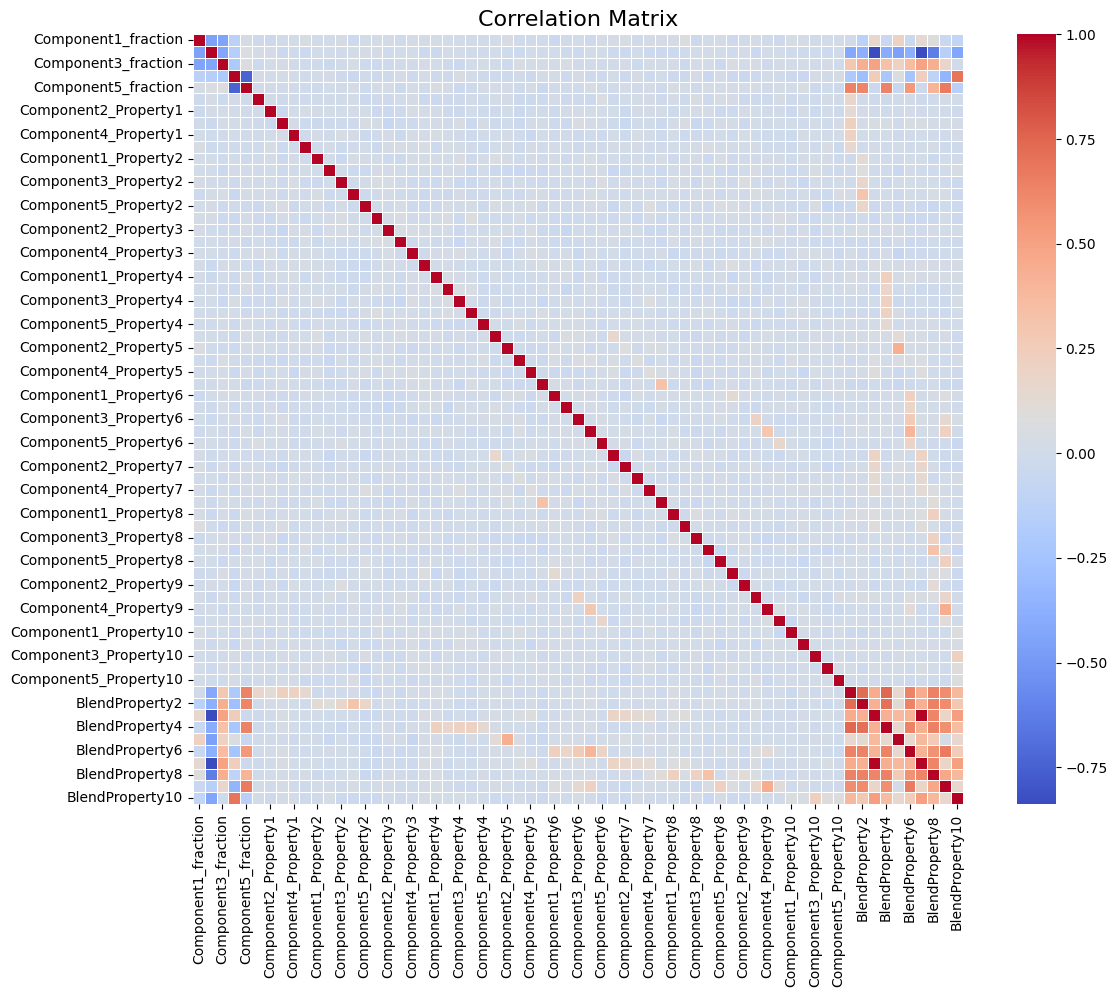

In [11]:
# Correlation Matrix

corr = train.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f", cbar=True, square=True, linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

#### Summary: Key Correlation Matrix Insights

Component_Property Features: Show very low correlation with each other (white/light patches). This is good for a machine learning model as it reduces redundancy.

Component_fraction Features: Show significant correlation with the Target (BlendProperty) variables (dark red/blue patches). This makes them the most important features for prediction.

Conclusion for the Project: The model should primarily focus on the Component_fraction features to predict the target BlendProperty values, as they have the strongest relationship.

## Multicollinearity Analysis & Feature Engineering

In [12]:
# Step 1: Sirf woh 5 features ek alag variable mein lo
fraction_features = train[['Component1_fraction', 'Component2_fraction', 'Component3_fraction', 'Component4_fraction', 'Component5_fraction']]

# Step 2: Har row (horizontal) ka sum calculate karo
sum_of_fractions = fraction_features.sum(axis=1)

# Step 3: Ye sum print karke dekho - kya har row ka sum exactly 1.0 hai?
print("Pehle 5 rows ka sum:")
print(sum_of_fractions.head())

# # Step 4: Confirm karne ke liye check karo ke kya saare sums exactly 1.0 hain
# print("\nKya har row ka sum exactly 1.0 hai?")
# print((sum_of_fractions == 1.0).all())

# # Agar thode se rounding errors hain (jaise 1.0000001), toh round off kar ke check karo
# print("\nKya har row ka sum lagbhag 1.0 hai?")
# print((sum_of_fractions.round(5) == 1.0).all())

Pehle 5 rows ka sum:
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64


array([[<Axes: title={'center': 'Component1_fraction'}>,
        <Axes: title={'center': 'Component2_fraction'}>],
       [<Axes: title={'center': 'Component3_fraction'}>,
        <Axes: title={'center': 'Component4_fraction'}>],
       [<Axes: title={'center': 'Component5_fraction'}>, <Axes: >]],
      dtype=object)

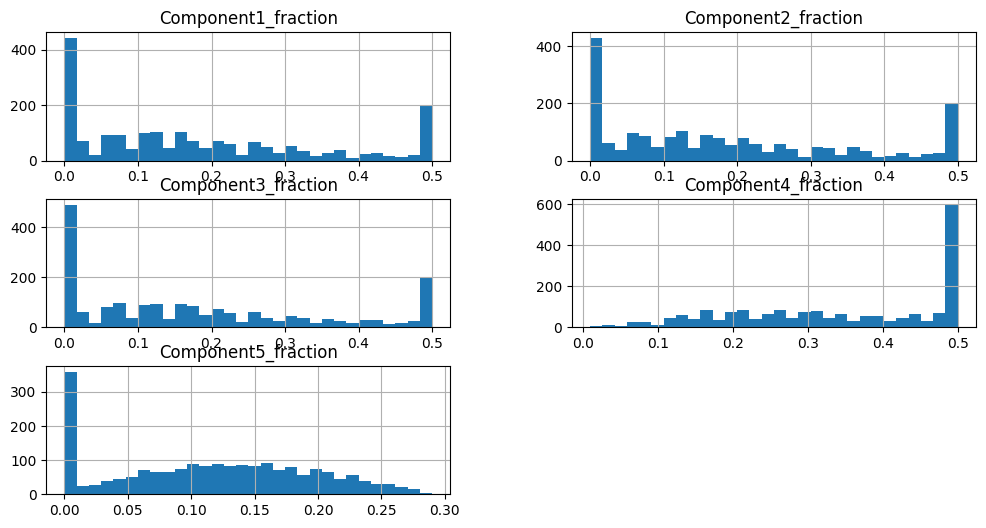

In [13]:
# i want to check component fractions values which are 0s
input_features[input_features[['Component1_fraction', 'Component2_fraction', 'Component3_fraction','Component4_fraction', 'Component5_fraction']].eq(0).any(axis=1)]
input_features[['Component1_fraction', 'Component2_fraction', 'Component3_fraction','Component4_fraction', 'Component5_fraction']].describe()
input_features[['Component1_fraction', 'Component2_fraction', 'Component3_fraction','Component4_fraction', 'Component5_fraction']].hist(bins=30, figsize=(12,6))

In [14]:
input_features.shape, target_features.shape

((2000, 55), (2000, 10))

In [15]:
# Drop the Component3_fraction column

input_features= input_features.drop(columns=['Component3_fraction'])

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Scale features (VIF requires standardized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(input_features)

# Step 2: Compute VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = input_features.columns
vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Step 3: Sort VIF values
vif.sort_values(by="VIF", ascending=False)


,Feature,VIF
2,Component4_fraction,2.557592
3,Component5_fraction,2.360681
1,Component2_fraction,1.405353
0,Component1_fraction,1.393350
28,Component5_Property5,1.151992
38,Component5_Property7,1.143918
32,Component4_Property6,1.111548
47,Component4_Property9,1.108671
46,Component3_Property9,1.076259
31,Component3_Property6,1.075957


## Summary: Multicollinearity Analysis & Feature Engineering
1. Project Context (Shell AI Hackathon)
The goal is to predict 10 BlendProperty values based on a mixture of 5 components. Each component has two types of features:

Component_fraction: The ratio of each component in the blend (5 features total).

Component_Property: 10 distinct properties for each component (50 features total).

2. The Initial Problem: Perfect Multicollinearity

The five Component_fraction features always sum to 1.0 (or 100%), creating a perfect mathematical relationship.

This caused the Variance Inflation Factor (VIF) for these features to be infinite (inf), a condition known as perfect multicollinearity.

This is a critical issue for linear models, as it makes it impossible for them to estimate the individual effect of each component.

3. The Investigation & Solution

Root Cause: Since the fractions sum to 1, any one fraction can be perfectly calculated from the other four (e.g., C5 = 1 - (C1 + C2 + C3 + C4)). This makes one feature redundant.

Solution Implemented: We dropped one redundant feature (Component3_fraction). However, VIF values for the remaining four fractions were are good (1.4 to 2.6), this successfully resolved the multicollinearity.


4. Final Result & Validation

The VIF for the four remaining Component_fraction features now falls in the excellent range of 1.4 to 2.6.

All other Component_Property features show ideal VIF values between 1.0 and 1.2.

The presence of many zero values in the fractions was noted but is a natural characteristic of the data (indicating the absence of a component in some blends) and does not negatively impact this solution.

5. Conclusion
The feature set has been successfully optimized. By reducing the five original Component_fraction features to three, we have:

✅ Eliminated destructive multicollinearity.

✅ Retained all essential information (as the dropped features were mathematically redundant).

✅ Created a robust dataset ready for effective model training.

In [17]:
# ✅ Save processed data for next notebook
import os

# Create directories if they don't exist
os.makedirs('../processed_data', exist_ok=True)
os.makedirs('../models', exist_ok=True)

# Save processed features
input_features.to_csv('../processed_data/X_processed.csv', index=False)
target_features.to_csv('../processed_data/y_processed.csv', index=False)

# Save test data as well (if needed for future)
test.to_csv('../processed_data/test_processed.csv', index=False)

# Save target columns list (important!)
import joblib
joblib.dump(target_columns, '../models/target_columns.pkl')

print("✅ All files saved successfully!")
print("📁 Files saved in '../processed_data/' folder")

✅ All files saved successfully!
📁 Files saved in '../processed_data/' folder
